<a href="https://colab.research.google.com/github/Daylon7/DS-Homeworks/blob/main/Desafio_Hiperparametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature Engineering using Titanic Dataset

## Step 1: Import Data and Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [2]:
titanic.head(3) # Verify the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Step 2: Analysis and Preprocessing

### Nulls

#### Age

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



Passenger ID: Identifier.

Survived: if the passenger survives is 1, otherwise is 0. It's the target variable to predict

Pclass: is the socioeconomic class of the passenger and it's clasified: 1: Upper; 2: Middle ; 3: Lower

Name: the names and the title of the passengers

Sex: if the passenger is male or female

Age: the ages of the passengers

SibSp: is the total number of the passengers' siblings and spouse.

Parch:  is the total number of the passengers' parents and children.

Ticket: is the number of the ticket

Fare: price of the ticket

Cabin: is the number of the cabin

Embarked: is port of embarkation and has 3 unique values C, Q or S:
C = Cherbourg
Q = Queenstown
S = Southampton

In [4]:
titanic.isnull().sum() # Verify the quantity of nulls

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


We see the variable 'Age' has 177 Nulls, we can review this. Other Variable that has a lot of nulls is Cabin. Embarked has 2 nulls.

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic['Age'] = titanic['Age'].replace(np.nan,30) # The median value of the age aproximately

In [7]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


#### Cabin

In [8]:
# Extract the letters in 'Cabin' using a regular expression:
titanic['Cabin_Letters'] = titanic['Cabin'].str.extract('([A-Za-z]+)', expand=False)

# Verify
print(titanic[['Cabin', 'Cabin_Letters']].head())

# We drop the column of Cabin
titanic = titanic.drop(['Cabin'], axis=1)

  Cabin Cabin_Letters
0   NaN           NaN
1   C85             C
2   NaN           NaN
3  C123             C
4   NaN           NaN


In [9]:
# We assing values with 'Cabin Letters' by 5 groups, where 'M' is the NaN group

titanic['Cabin_Letters'] = titanic['Cabin_Letters'].replace(['A', 'B', 'C'], 'ABC')
titanic['Cabin_Letters'] = titanic['Cabin_Letters'].replace(['D', 'E'], 'DE')
titanic['Cabin_Letters'] = titanic['Cabin_Letters'].replace(['F', 'G'], 'FG')
titanic['Cabin_Letters'] = titanic['Cabin_Letters'].replace(['T'], 'ABC')
titanic['Cabin_Letters'] = titanic['Cabin_Letters'].fillna('M')

titanic['Cabin_Letters'].value_counts()

,count
Cabin_Letters,
M,687
ABC,122
DE,65
FG,17


#### Embarked

In [10]:
# The missing values are two, we can consider to avoid. However, those missing values is from passengers with the value of 'S' according to the research in kaggle

titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [11]:
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Letters
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,ABC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,ABC


### Title's Info

We can get info to improve the accuracy of the models if we consider that the name includes a Title as Mr, Ms, Miss, etc. The name has this structure:

Last Name, Title . First Name

Where we can extract the title with this code

In [12]:
titanic['Title_1'] = titanic['Name'].str.split(', ', expand=True)[1] # Extract after the comma
titanic['Title_2'] = titanic['Title_1'].str.split('. ', expand=True)[0] # Extract before the point


In [13]:
titanic = titanic.drop('Title_1', axis = 1) # Eliminamos esta columna auxiliar
titanic = titanic.rename(columns={'Title_2': 'Title'}) #Renombramos la columna
titanic.head(4) #Review

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Letters,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,M,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,ABC,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,M,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,ABC,Mrs


In [14]:
#titanic['Family_Size'] = titanic['SibSp'] + titanic['Parch'] + 1 (Agruparlo por medio de la cantidad de personas relacionadas disminye 1% la prediccion con el uso de la regresión logistica)

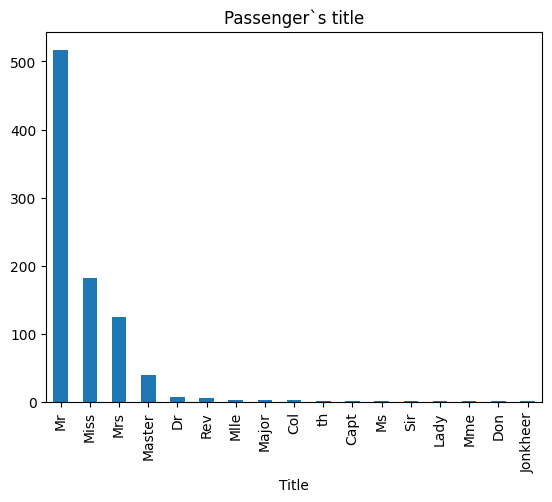

In [15]:
plot = titanic['Title'].value_counts().plot(kind='bar', title='Passenger`s title') # Grafica de los titulos

<ipython-input-16-d5a0cade015e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Title'].replace(['Ms', 'Mlle', 'Lady', 'Mme', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev', 'Mlle', 'th'  ],['Miss','Miss','Miss','Miss', 'Dr', 'Dr','Dr','Dr','Dr','Dr','Dr','Miss', 'Dr' ],inplace=True)


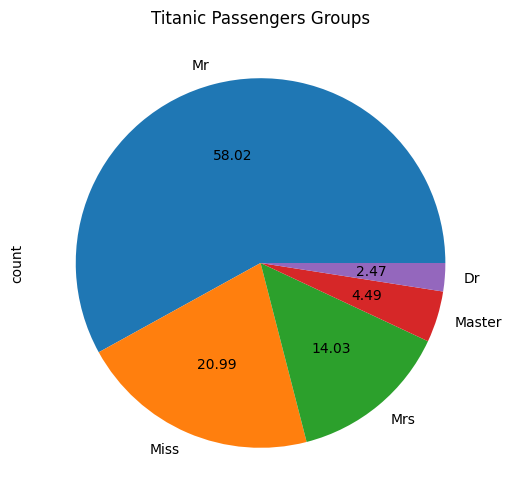

In [16]:
#We can replace the values as Lady as Miss. Also, we can group some titles as Capt as Dr:

titanic['Title'].replace(['Ms', 'Mlle', 'Lady', 'Mme', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev', 'Mlle', 'th'  ],['Miss','Miss','Miss','Miss', 'Dr', 'Dr','Dr','Dr','Dr','Dr','Dr','Miss', 'Dr' ],inplace=True)


plot = titanic['Title'].value_counts().plot(kind='pie', autopct='%.2f',
                                            figsize=(6, 6),
                                            title='Titanic Passengers Groups') #Verificamos con el grafico de torta para ver la distribucion de los titulos

### One Hot Encoding

We implement this method to convert the categorical variables as  Sex and Embarked to numerical variables

In [17]:
# We use the category of Title but it gives an error where it says Shape of passed values is (891, 1), indices imply (891, 11) one hot encoder. Instead, we use Label Encoder to this category

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Hacer Make columns para One Hot Encoder
transformer = make_column_transformer(
    (OneHotEncoder(), ['Sex','Embarked', 'Cabin_Letters']),
    remainder='drop')

transformed = transformer.fit_transform(titanic)
transformed

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [18]:
transformer.get_feature_names_out()

array(['onehotencoder__Sex_female', 'onehotencoder__Sex_male',
       'onehotencoder__Embarked_C', 'onehotencoder__Embarked_Q',
       'onehotencoder__Embarked_S', 'onehotencoder__Cabin_Letters_ABC',
       'onehotencoder__Cabin_Letters_DE',
       'onehotencoder__Cabin_Letters_FG',
       'onehotencoder__Cabin_Letters_M'], dtype=object)

In [19]:
transformed_df = pd.DataFrame(
    transformed, #datos del dataframe
    columns=transformer.get_feature_names_out().tolist() # nombres de las columnas
)

##Mostrar info
transformed_df.head()

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Cabin_Letters_ABC,onehotencoder__Cabin_Letters_DE,onehotencoder__Cabin_Letters_FG,onehotencoder__Cabin_Letters_M
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [20]:
lista = [transformed_df,titanic.drop(['Sex','Embarked'],axis=1)]

In [21]:
df_transformed= pd.concat(lista,axis=1)
df_transformed.head(3)

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Cabin_Letters_ABC,onehotencoder__Cabin_Letters_DE,onehotencoder__Cabin_Letters_FG,onehotencoder__Cabin_Letters_M,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin_Letters,Title
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,M,Mr
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,ABC,Mrs
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,M,Miss


In [22]:
df_transformed

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Cabin_Letters_ABC,onehotencoder__Cabin_Letters_DE,onehotencoder__Cabin_Letters_FG,onehotencoder__Cabin_Letters_M,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin_Letters,Title
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,M,Mr
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,ABC,Mrs
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,M,Miss
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,ABC,Mrs
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,M,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,M,Dr
887,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,ABC,Miss
888,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",30.0,1,2,W./C. 6607,23.4500,M,Miss
889,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,ABC,Mr


### Label Encoder

We use the Method Label Encoder for the Title column

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_transformed['Numerical_Title'] = encoder.fit_transform(df_transformed['Title'])
df_transformed

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Cabin_Letters_ABC,onehotencoder__Cabin_Letters_DE,onehotencoder__Cabin_Letters_FG,onehotencoder__Cabin_Letters_M,PassengerId,...,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin_Letters,Title,Numerical_Title
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,...,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,M,Mr,3
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,...,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,ABC,Mrs,4
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,...,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,M,Miss,2
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4,...,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,ABC,Mrs,4
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5,...,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,M,Mr,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,887,...,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,M,Dr,0
887,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,888,...,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,ABC,Miss,2
888,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,889,...,3,"Johnston, Miss. Catherine Helen ""Carrie""",30.0,1,2,W./C. 6607,23.4500,M,Miss,2
889,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,890,...,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,ABC,Mr,3


Here we can see that Label Encoder tranforms the column of title with these values

0 Dr

1 Master

2 Miss

3 Mr

4 Mrs

### Female Married

We also can create a new column called femaleMarried. Mrs is all the females that are married. Mrs has the value of 4 in the column of Numerical Title.

We can get this new column with the code below. We use 1 if fullfill the condition, else is 0

In [24]:
df_transformed['femaleMarried'] = 0
df_transformed['femaleMarried'].loc[df_transformed['Numerical_Title'] == 4] = 1

<ipython-input-24-022b0fabad8b>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_transformed['femaleMarried'].loc[df_transformed['Numerical_Title'] == 4] = 1
<ipython-input-24-022b0fabad8b>:2: SettingWithCopyWarning: 
A value is trying to

In [25]:
df_transformed.head(3)

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Cabin_Letters_ABC,onehotencoder__Cabin_Letters_DE,onehotencoder__Cabin_Letters_FG,onehotencoder__Cabin_Letters_M,PassengerId,...,Name,Age,SibSp,Parch,Ticket,Fare,Cabin_Letters,Title,Numerical_Title,femaleMarried
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,...,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,M,Mr,3,0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,...,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,ABC,Mrs,4,1
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,...,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,M,Miss,2,0


### Dataset Numerico

In [26]:
 df_num = df_transformed.select_dtypes('number')
 df_num.head(3)

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Cabin_Letters_ABC,onehotencoder__Cabin_Letters_DE,onehotencoder__Cabin_Letters_FG,onehotencoder__Cabin_Letters_M,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Numerical_Title,femaleMarried
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,3,22.0,1,0,7.2500,3,0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,1,38.0,1,0,71.2833,4,1
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,1,3,26.0,0,0,7.9250,2,0


### Ultima preparación

In [27]:
df_num.dropna(inplace = True)
X = df_num.drop('Survived',axis=1)
y = df_num['Survived']

In [28]:
from sklearn.model_selection import train_test_split
#Train y Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
X_test

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Cabin_Letters_ABC,onehotencoder__Cabin_Letters_DE,onehotencoder__Cabin_Letters_FG,onehotencoder__Cabin_Letters_M,PassengerId,Pclass,Age,SibSp,Parch,Fare,Numerical_Title,femaleMarried
709,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,710,3,30.0,1,1,15.2458,1,0
439,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,440,2,31.0,0,0,10.5000,3,0
840,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,841,3,20.0,0,0,7.9250,3,0
720,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,721,2,6.0,0,1,33.0000,2,0
39,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,40,3,14.0,1,0,11.2417,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,822,3,27.0,0,0,8.6625,3,0
633,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,634,1,30.0,0,0,0.0000,3,0
456,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,457,1,65.0,0,0,26.5500,3,0
500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,501,3,17.0,0,0,8.6625,3,0


In [30]:
y_test

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
821,1
633,0
456,0
500,0


## Step 3: Machine Learning Models

### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(max_depth=2) #instanciar el objeto
clf.fit(X_train, y_train) # Ajuste con los datos de titanic
y_pred = clf.predict(X_test) #Predicción
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7910447761194029


In [32]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0])

### KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

neigh = KNeighborsClassifier(n_neighbors=3) #instanciar el objeto
neigh.fit(X_train, y_train) # Ajuste con los datos de titanic
y_pred = neigh.predict(X_test) #Predicción
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6156716417910447


### Logit

In [34]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8171641791044776


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


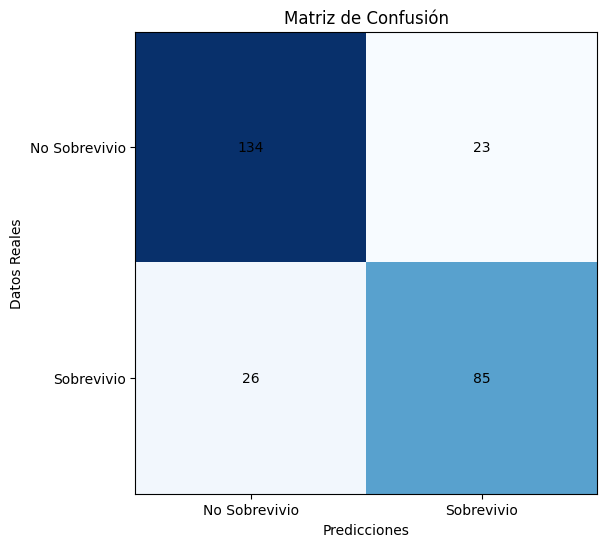

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Etiquetas para la matriz de confusión
labels = ['No Sobrevivio', 'Sobrevivio']

# Crear figura y eje
fig, ax = plt.subplots(figsize=(8, 6))

# Mostrar matriz de confusión
ax.imshow(cm, interpolation='nearest', cmap='Blues')
ax.set_title('Matriz de Confusión')
ax.set_xlabel('Predicciones')
ax.set_ylabel('Datos Reales')
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Mostrar valores en la matriz
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()

Análisis de la Matriz de Confusión


Predicción de "No Sobrevivió" (VP y FN):

Aunque hay más verdaderos positivos (134) que falsos negativos (26), lo que indica que el modelo es bueno identificando no sobrevivientes.

Predicción de "Sobrevivió" (VN y FP):

Hay 85 verdaderos negativos y 23 falsos positivos, el modelo es bueno identificando sobrevivientes, pero en menor medida que los no sobrevivientes

Reto: Mejorar el Feature Engineering

Obtener ideas e implementarlos en el codigo
https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial


### Hypertunning Hiperparameters

We can get the best combination of parameters. We'll use Randomized Search CV

In [37]:
from sklearn.model_selection import RandomizedSearchCV

#### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier()
params_grid = {
        'n_estimators': [10, 100, 200], # El número de árboles en el bosque.
        'max_depth': [3, 5, 7, 10, 15], # La profundidad máxima de cada árbol en el bosque
        'min_samples_split': [2, 5, 10], #El número mínimo de muestras necesarias para dividir un nodo interno.
        'criterion':['entropy','gini']
        }
grid_cv = RandomizedSearchCV(clf, params_grid, scoring="accuracy", n_jobs=-1, cv=3) # Usamos este modelo por su rapidez a la hora de la ejecucion
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Mejores parametros {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 10, 'criterion': 'entropy'}
Mejor score de CV 0.8314675461414592
Accuracy del modelo = 0.8097


De aqui podemos extraer que el mejor modelo contiene los parametros n_estimators': 100, 'min_samples_split': 5, 'max_depth': 15, 'criterion': 'entropy'. Asi mismo, la prediccion mejoro de un 78% a un 81% aproximadamente

#### KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

neigh = KNeighborsClassifier() #instanciar el objeto

params_grid = { 'n_neighbors' : [3,4,5,6,7,9,11,13,15], # Numero de vecinos
               'weights' : ['uniform','distance'],  # Uniforme se refiere a que todos los puntos de un grupo tienen el mismo peso, distancia es cuando toma relevancia la cercania entre un punto y otro del grupo
               'metric' : ['minkowski','euclidean','manhattan']} # Tipo de distancia

grid_cv = RandomizedSearchCV(neigh, params_grid, scoring="accuracy", n_jobs=-1, cv=3) # Usamos este modelo por su rapidez a la hora de la ejecucion
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Mejores parametros {'weights': 'uniform', 'n_neighbors': 13, 'metric': 'manhattan'}
Mejor score de CV 0.6757168958255915
Accuracy del modelo = 0.66791


De aqui podemos extraer que el mejor modelo contiene los parametros 'weights': 'uniform', 'n_neighbors': 13, 'metric': 'manhattan'. Asi mismo, la prediccion mejoro de un 62% a un 67% aproximadamente

#### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()

params_grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]}    #Codigo Extraido del ejemplo de Kaggle

grid_cv = RandomizedSearchCV(logModel, params_grid, scoring="accuracy", n_jobs=-1, cv=3) # Usamos este modelo por su rapidez a la hora de la ejecucion
grid_cv.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
24 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [41]:
print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Mejores parametros {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 11.288378916846883}
Mejor score de CV 0.8138238573021183
Accuracy del modelo = 0.80597


Hay que revisar en la regresion Logistica los parametros para verificar. Ya que por esta parte esta dando un accuracy menor (80%) que el anterior (82%)

# Reducción de Dimensionalidad

Tomamos en cuenta el código presentado por los compañeros:

Escogemos las variables numéricas a destacar: Age (Edad), Fare (Tarifa), Pclass (Clase Socioeconómica), SibSp (Hermanos) y Parch (Padres)

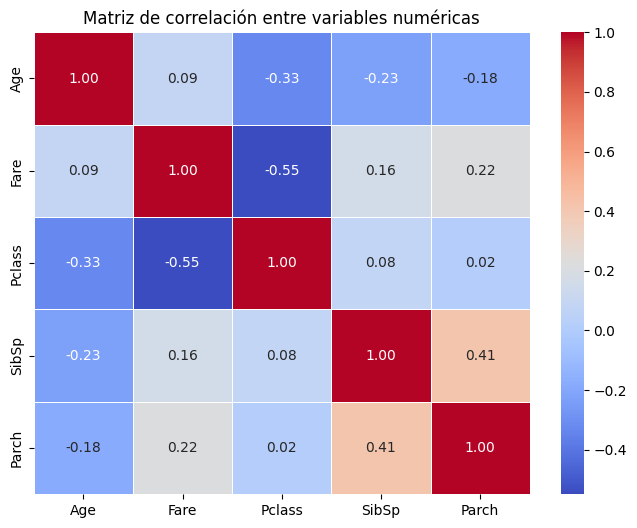

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de variables numéricas
num_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']

# Crear matriz de correlación
correlation_matrix = titanic[num_features].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

Por aqui vemos entonces que:

La edad tiene baja correlación con las demás variables
Fare (Tarifa) tiene una correlación media con respecto a la Pclass. Por intuición, se puede tomar en cuenta que los de mayor clase económica son los que se pueden costear tarifas más altas. El resto de las variables posee baja o nula correlación
Pclass: idéntico al caso anterior. No posee correlación significativa en otra variable que no sea Fare
SibSp: Posee una correlación media con Parch. Por intuición, se puede tomar en cuenta que los que suelen traer a su hermano, también pueden tener presente a sus familiares.


## PCA

In [43]:
# Selección de variables numéricas
num_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
X = titanic[num_features]

In [44]:
X

,Age,Fare,Pclass,SibSp,Parch
0,22.0,7.2500,3,1,0
1,38.0,71.2833,1,1,0
2,26.0,7.9250,3,0,0
3,35.0,53.1000,1,1,0
4,35.0,8.0500,3,0,0
...,...,...,...,...,...
886,27.0,13.0000,2,0,0
887,19.0,30.0000,1,0,0
888,30.0,23.4500,3,1,2
889,26.0,30.0000,1,0,0


In [45]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Escalado de Datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
#Aplicacion de PCA
from sklearn.decomposition import PCA

pca = PCA() #instanciar el objeto como primer paso
X_train = pca.fit_transform(X_train) #segundo el fit
X_test = pca.transform(X_test) # predict --> transform

In [50]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.33588159, 0.32625628, 0.14774102, 0.1109951 , 0.07912601])

El primer componente explica la varianza un 33,6%; la segunda componente un 0,3263 y la tercera componente explica un 14,77%. La combinación de los mismos explica la varianza en un 80% de los casos

Este código ejemplifica con mayor detalle el PCA:

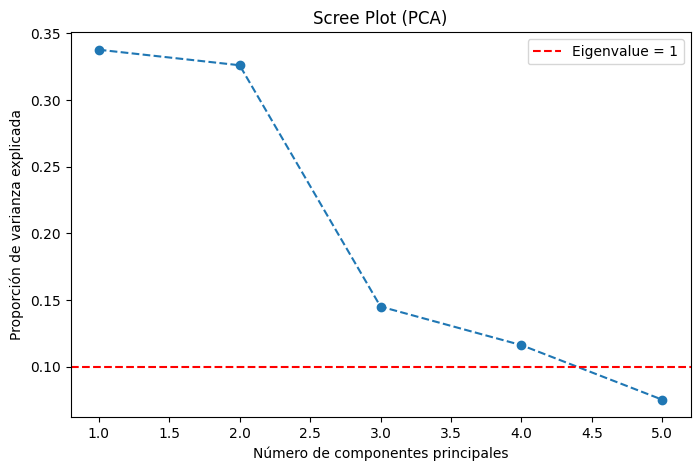

Varianza explicada acumulada:
[0.33776201 0.66387444 0.80887108 0.92491469 1.        ]

Cargas de los componentes principales:
             PC1       PC2       PC3       PC4       PC5
Age    -0.451501 -0.321306  0.804521  0.070118  0.201838
Fare   -0.562018  0.368488 -0.335107  0.014175  0.660192
Pclass  0.680596 -0.054357  0.186681 -0.038852  0.705319
SibSp   0.125684  0.611986  0.279274  0.721076 -0.108313
Parch   0.035695  0.619272  0.357219 -0.688057 -0.119167


In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Seleccionar las variables numéricas
variables = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
titanic_selected = titanic[variables]

# Escalar las variables
scaler = StandardScaler()
titanic_scaled = scaler.fit_transform(titanic_selected)

# Aplicar PCA
pca = PCA()
pca_components = pca.fit_transform(titanic_scaled)

# Proporción de varianza explicada
explained_variance = pca.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot (PCA)')
plt.xlabel('Número de componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.axhline(y=0.1, color='r', linestyle='--', label="Eigenvalue = 1")
plt.legend()
plt.show()

# Varianza acumulada
varianza_acumulada = explained_variance.cumsum()
print("Varianza explicada acumulada:")
print(varianza_acumulada)

# Cargas de los componentes principales
cargas = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(len(explained_variance))], index=variables)
print("\nCargas de los componentes principales:")
print(cargas)


In [52]:
from sklearn.decomposition import PCA
#Usamos 3 componentes
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
model_rf.fit(X_train, y_train)

# Predicción
y_pred = model_rf.predict(X_test)

In [54]:
#Evaluación básica del modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)

El accuracy del modelo es: 0.6828358208955224


Este es el accuracy del modelo con las tres variables PCA. Se deben añadir otras variables del dataframe original que pueden ser útiles para la predicción

In [55]:
pca_df = pd.DataFrame(
    pca_components[:, :3],  # Tomamos solo las primeras 3 componentes
    columns=['PCA1', 'PCA2', 'PCA3'])
pca_df

,PCA1,PCA2,PCA3
0,1.152552,-0.066751,-0.205851
1,-1.756946,0.142842,-0.094180
2,0.891901,-0.715920,-0.216167
3,-1.446952,0.082108,-0.157219
4,0.577795,-0.937516,0.340168
...,...,...,...
886,-0.014770,-0.637941,-0.411910
887,-0.743693,-0.248962,-1.245293
888,0.779901,1.393054,1.066947
889,-0.986897,-0.422035,-0.811931


Vamos a añadirle las otras variables antes mencionadas

In [56]:
df_new = df_num.drop(['Age', 'Fare', 'Pclass', 'SibSp', 'Parch'], axis=1)
df_new

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Cabin_Letters_ABC,onehotencoder__Cabin_Letters_DE,onehotencoder__Cabin_Letters_FG,onehotencoder__Cabin_Letters_M,PassengerId,Survived,Numerical_Title,femaleMarried
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,3,0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,4,1
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,1,2,0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4,1,4,1
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,887,0,0,0
887,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,888,1,2,0
888,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,889,0,2,0
889,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,890,1,3,0


In [57]:
#Unimos los dataframes de PCA y los del Titanic valorados anteriormente
df_new_num = pd.concat([df_new, pca_df], axis=1)
df_new_num.head(5)

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Cabin_Letters_ABC,onehotencoder__Cabin_Letters_DE,onehotencoder__Cabin_Letters_FG,onehotencoder__Cabin_Letters_M,PassengerId,Survived,Numerical_Title,femaleMarried,PCA1,PCA2,PCA3
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,3,0,1.152552,-0.066751,-0.205851
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,4,1,-1.756946,0.142842,-0.094180
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,1,2,0,0.891901,-0.715920,-0.216167
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4,1,4,1,-1.446952,0.082108,-0.157219
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5,0,3,0,0.577795,-0.937516,0.340168


In [58]:
df_new_num.dropna(inplace = True)
X = df_new_num.drop('Survived',axis=1)
y = df_new_num['Survived']

In [59]:
from sklearn.model_selection import train_test_split
#Train y Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from sklearn.ensemble import RandomForestClassifier

# Creación del modelo
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
model_rf.fit(X_train, y_train)

# Predicción
y_pred = model_rf.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)



El accuracy del modelo es: 0.8022388059701493


Usaremos algunas métricas para la evaluación del modelo:

In [ ]:
#Precisition Score
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7959183673469388

In [ ]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[137,  20],
       [ 33,  78]])

In [ ]:
#Recall Score
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.7027027027027027

In [ ]:
#F1 Score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.7464114832535885

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.80      0.70      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



Proximamente, evaluaremos los otros modelos de reducción de dimensionalidad

Ahora hacemos Optimizacion por Hiperparametros

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier()
params_grid = {
        'n_estimators': [10, 100, 200], # El número de árboles en el bosque.
        'max_depth': [3, 5, 7, 10, 15], # La profundidad máxima de cada árbol en el bosque
        'min_samples_split': [2, 5, 10], #El número mínimo de muestras necesarias para dividir un nodo interno.
        'criterion':['entropy','gini']
        }
grid_cv = RandomizedSearchCV(clf, params_grid, scoring="accuracy", n_jobs=-1, cv=3) # Usamos este modelo por su rapidez a la hora de la ejecucion
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Mejores parametros {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 7, 'criterion': 'gini'}
Mejor score de CV 0.825026322308931
Accuracy del modelo = 0.81343


In [71]:
# Comprobamos
from sklearn.model_selection import train_test_split
#Train y Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from sklearn.ensemble import RandomForestClassifier

# Creación del modelo
model_rf = RandomForestClassifier(max_depth=7, n_estimators=100, min_samples_split=2, criterion='gini')
model_rf.fit(X_train, y_train)

# Predicción
y_pred = model_rf.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)

El accuracy del modelo es: 0.8134328358208955


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.81      0.71      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



Como se puede observar, en comparacion con el random forest con el parametro max depth = 2, con el uso de los metodos de optimizacion por hiperparametros se obtuvo un f1 score de 0.85 / 0.76 en contraste con el modelo anterior 0.84 / 0.75.

# Manejo de Outliers

Usaremos el dataframe obtenido del apartado anterior

In [73]:
df_new_num.head()

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Cabin_Letters_ABC,onehotencoder__Cabin_Letters_DE,onehotencoder__Cabin_Letters_FG,onehotencoder__Cabin_Letters_M,PassengerId,Survived,Numerical_Title,femaleMarried,PCA1,PCA2,PCA3
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,3,0,1.152552,-0.066751,-0.205851
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,4,1,-1.756946,0.142842,-0.094180
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,1,2,0,0.891901,-0.715920,-0.216167
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4,1,4,1,-1.446952,0.082108,-0.157219
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5,0,3,0,0.577795,-0.937516,0.340168


Visualizamos los Outliers:

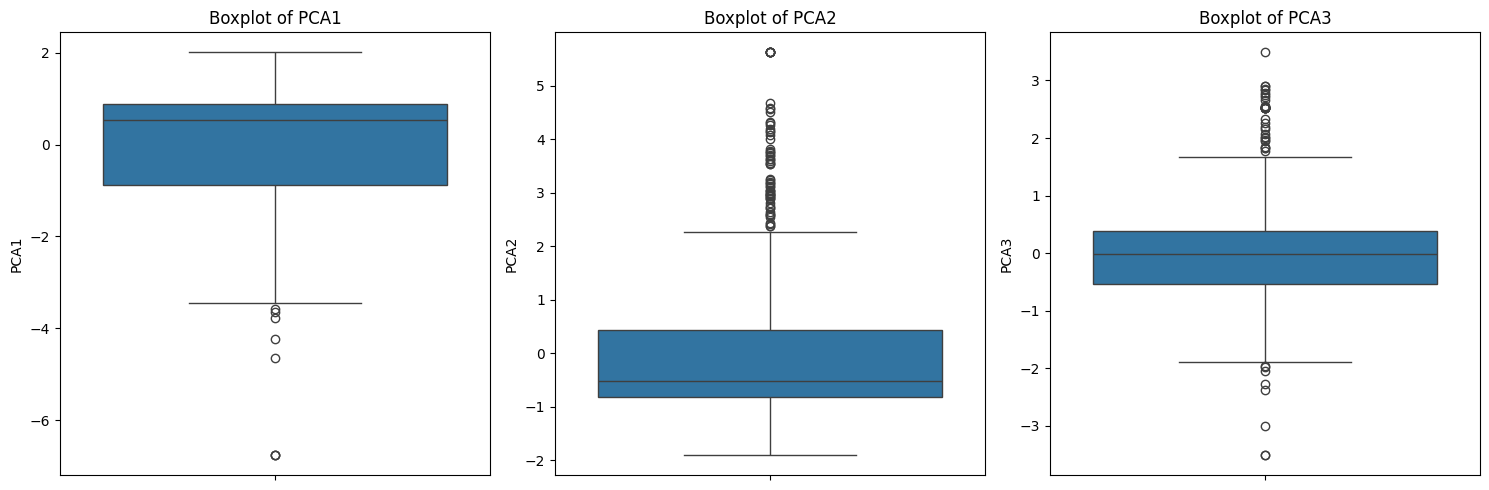

In [74]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(["PCA1", "PCA2", "PCA3"], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_new_num[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

Tomamos en cuenta el siguiente código con unas variaciones:

In [75]:
#Eliminamos los valores atípicos presentes en las columnas "PCA1", "PCA2", "PCA3"

import pandas as pd

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Removemos los valores de las columnas
df_no_outliers = remove_outliers_iqr(df_new_num, 'PCA1')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'PCA2')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'PCA3')

# hacemos un print del nuevo dataset
print(df_no_outliers.head())

   onehotencoder__Sex_female  onehotencoder__Sex_male  \
0                        0.0                      1.0   
1                        1.0                      0.0   
2                        1.0                      0.0   
3                        1.0                      0.0   
4                        0.0                      1.0   

   onehotencoder__Embarked_C  onehotencoder__Embarked_Q  \
0                        0.0                        0.0   
1                        1.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   onehotencoder__Embarked_S  onehotencoder__Cabin_Letters_ABC  \
0                        1.0                               0.0   
1                        0.0                               1.0   
2                        1.0                               0.0   
3                        1.0          

In [81]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Assuming 'df_new_num' is your numerical DataFrame
# ... (your existing code) ...

# Identify outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.1) # Adjust contamination as needed
outliers = iso_forest.fit_predict(df_new_num)

# Create a new DataFrame with outlier labels
df_new_num['outlier'] = outliers

# Filter out outliers (outlier values are -1)
df_no_outliers = df_new_num[df_new_num['outlier'] == 1].drop('outlier', axis=1)

# Now df_no_outliers contains the data without outliers
# You can proceed with your modeling using this DataFrame

# Example: using the outlier-free data for RandomForestClassifier
X = df_no_outliers.drop('Survived', axis=1)
y = df_no_outliers['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

model_rf = RandomForestClassifier(max_depth=2)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)

El accuracy del modelo es: 0.8506224066390041


In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       165
           1       0.78      0.74      0.76        76

    accuracy                           0.85       241
   macro avg       0.83      0.82      0.82       241
weighted avg       0.85      0.85      0.85       241



Ahora con optimizacion de hiperparametros

In [83]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df_new_num' is your numerical DataFrame
# ... (your existing code) ...

# Identify outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.1) # Adjust contamination as needed
outliers = iso_forest.fit_predict(df_new_num)

# Create a new DataFrame with outlier labels
df_new_num['outlier'] = outliers

# Filter out outliers (outlier values are -1)
df_no_outliers = df_new_num[df_new_num['outlier'] == 1].drop('outlier', axis=1)

# Now df_no_outliers contains the data without outliers
# You can proceed with your modeling using this DataFrame

# Example: using the outlier-free data for RandomForestClassifier
X = df_no_outliers.drop('Survived', axis=1)
y = df_no_outliers['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

model_rf = RandomForestClassifier()

params_grid = {
        'n_estimators': [10, 100, 200], # El número de árboles en el bosque.
        'max_depth': [3, 5, 7, 10, 15], # La profundidad máxima de cada árbol en el bosque
        'min_samples_split': [2, 5, 10], #El número mínimo de muestras necesarias para dividir un nodo interno.
        'criterion':['entropy','gini']
        }
grid_cv = RandomizedSearchCV(model_rf, params_grid, scoring="accuracy", n_jobs=-1, cv=3) # Usamos este modelo por su rapidez a la hora de la ejecucion
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')




Mejores parametros {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 5, 'criterion': 'entropy'}
Mejor score de CV 0.7985739750445632
Accuracy del modelo = 0.87137


In [85]:
# Comprobamos

import pandas as pd
from sklearn.ensemble import IsolationForest

# Assuming 'df_new_num' is your numerical DataFrame
# ... (your existing code) ...

# Identify outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.1) # Adjust contamination as needed
outliers = iso_forest.fit_predict(df_new_num)

# Create a new DataFrame with outlier labels
df_new_num['outlier'] = outliers

# Filter out outliers (outlier values are -1)
df_no_outliers = df_new_num[df_new_num['outlier'] == 1].drop('outlier', axis=1)

# Now df_no_outliers contains the data without outliers
# You can proceed with your modeling using this DataFrame

# Example: using the outlier-free data for RandomForestClassifier
X = df_no_outliers.drop('Survived', axis=1)
y = df_no_outliers['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

model_rf = RandomForestClassifier(n_estimators= 200, min_samples_split= 5, max_depth= 5, criterion= 'entropy')
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)

El accuracy del modelo es: 0.8921161825726142


In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       161
           1       0.84      0.84      0.84        80

    accuracy                           0.89       241
   macro avg       0.88      0.88      0.88       241
weighted avg       0.89      0.89      0.89       241



De acuerdo a los valores del F1 nuevo (0.92/0.84) en comparacion con los del modelo anterior (0.89/0.76) se puede ver un incremento considerable en la precision del modelo